In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d = pd.read_csv('MCS_publications_author_order.csv')
d.Authorship_Type = pd.Categorical(d.Authorship_Type, categories=["First", "Second", "Senior", "Other"], ordered=True)
d.Year = d.Year.astype('int16')
print(len(d))
print(d)

545
                                 DOI                      Journal  Year  \
0       10.1371/journal.pone.0155235                     PLOS ONE  2016   
1          10.1017/s003060531300135x                         Oryx  2014   
2           10.1038/nplants.2015.142                Nature Plants  2015   
3           10.1038/nplants.2015.142                Nature Plants  2015   
4    10.1016/j.gloenvcha.2015.06.007  Global Environmental Change  2015   
..                               ...                          ...   ...   
540           10.1126/sciadv.abl4183             Science Advances  2022   
541           10.1126/sciadv.abl4183             Science Advances  2022   
542           10.1126/sciadv.abl4183             Science Advances  2022   
543                10.1002/ece3.8758        Ecology and Evolution  2022   
544                10.1002/ece3.8758        Ecology and Evolution  2022   

                                                 Title           Pub_Author  \
0    A Socio-Eco

# First just plot raw authorships
This means that some publications (where there are multiple MCS authors) might be counted multiple times

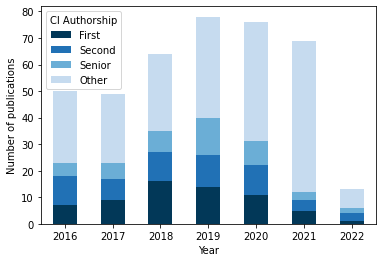

In [4]:
d_by_year = d.loc[d['Year'] > 2015, :].groupby(['Year','Authorship_Type'])['Authorship_Type'].count().unstack('Authorship_Type').fillna(0)
ax = d_by_year.plot.bar(stacked=True, rot=0, color=['#023858', '#2171b5', '#6baed6', '#c6dbef'])
ax.set(ylabel="Number of publications")
ax.legend(title='CI Authorship')
ax.figure.savefig('MCS_pubs_by_year_bar_with_duplicates.png', dpi=500, transparent=True)

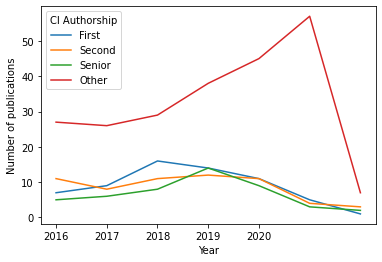

In [5]:
ax = d_by_year.plot(kind='line', rot=0)
ax.set(ylabel="Number of publications", xticks=np.arange(2016, 2021))
ax.legend(title='CI Authorship')
ax.figure.savefig('MCS_pubs_by_year_line_with_duplicates.png', dpi=500, transparent=True)

# Now plot each pub only once, using the "highest" level of authorship from that pub

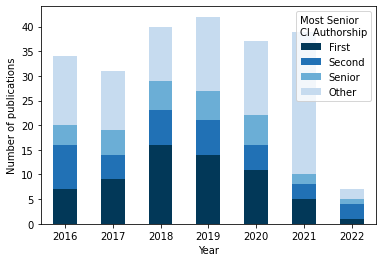

In [6]:
# Note for the below that the "max_authorship" is actually the minimum of the Authorship_Type field given the way the categories are ordered for plotting
d_perpub = d.loc[d['Year'] > 2015, :].groupby(
    ['DOI', 'Year']).agg(
    max_authorship=pd.NamedAgg(column='Authorship_Type', aggfunc=min))
d_perpub.max_authorship = pd.Categorical(d_perpub.max_authorship, categories=["First", "Second", "Senior", "Other"], ordered=True)
d_perpub = d_perpub.groupby(['Year','max_authorship'])['max_authorship'].count().unstack('max_authorship').fillna(0)
ax = d_perpub.plot.bar(rot=0, stacked=True, color=['#023858', '#2171b5', '#6baed6', '#c6dbef'])
ax.set(ylabel="Number of publications")
ax.legend(title='Most Senior\nCI Authorship')
ax.figure.savefig('MCS_pubs_by_year_most_senior_bar.png', dpi=500, transparent=True)

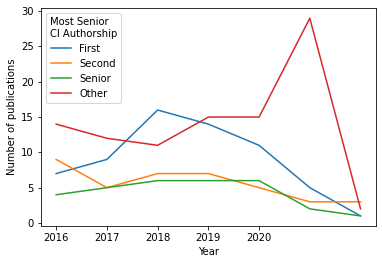

In [7]:
ax = d_perpub.plot(kind='line', rot=0)
ax.set(ylabel="Number of publications", xticks=np.arange(2016, 2021))
ax.legend(title='Most Senior\nCI Authorship')
ax.figure.savefig('MCS_pubs_by_year_most_senior_line.png', dpi=500, transparent=True)

# Now lump various categories of seniority

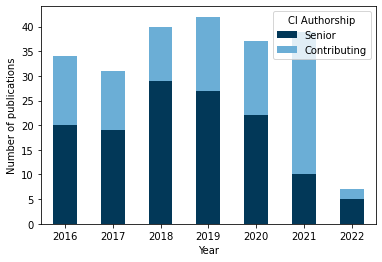

In [8]:
# Note for the below that the "max_authorship" is actually the minimum of the Authorship_Type field given the way the categories are ordered for plotting

d_perpub = d.loc[d['Year'] > 2015, :].groupby(
    ['DOI', 'Year']).agg(
    max_authorship=pd.NamedAgg(column='Authorship_Type', aggfunc=min))
d_perpub = d_perpub.replace({'max_authorship' : {"First": "Senior",
                                                 "Second": "Senior",
                                                 "Other": "Contributing"}})
d_perpub.max_authorship = pd.Categorical(d_perpub.max_authorship, categories=["Senior", "Contributing"], ordered=True)
d_perpub = d_perpub.groupby(['Year','max_authorship'])['max_authorship'].count().unstack('max_authorship').fillna(0)
ax = d_perpub.plot.bar(stacked=True, rot=0, color=['#023858', '#6baed6'])
ax.set(ylabel="Number of publications")
ax.legend(title='CI Authorship')
ax.figure.savefig('MCS_pubs_by_year_most_senior_bar_aggregated.png', dpi=500, transparent=True)

In [9]:
d_perpub = d_perpub.groupby(['Year','max_authorship'])['max_authorship'].count().unstack('max_authorship').fillna(0)
ax = d_perpub.plot(kind='bar', stacked=True, rot=0)
ax.set(ylabel="Number of publications")
ax.legend(title='Most Senior\nCI Authorship') 
ax.figure.savefig('MCS_pubs_by_year_most_senior_bar.png', dpi=500, transparent=True)

KeyError: 'max_authorship'

# Plot citations

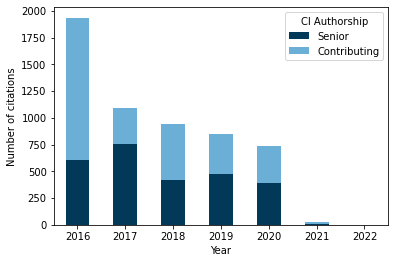

In [10]:
# Note for the below that the "max_authorship" is actually the minimum of the Authorship_Type field given the way the categories are ordered for plotting
d_perpub = d.loc[d['Year'] > 2015, :].groupby(
    ['DOI', 'Year', 'Citations']).agg(
    max_authorship=pd.NamedAgg(column='Authorship_Type', aggfunc=min))
d_perpub = d_perpub.replace({'max_authorship' : {"First": "Senior",
                                                 "Second": "Senior",
                                                 "Other": "Contributing"}})
d_perpub.max_authorship = pd.Categorical(d_perpub.max_authorship, categories=["Senior", "Contributing"], ordered=True)
d_perpub = d_perpub.reset_index().groupby(['Year','max_authorship']).agg({'Citations': ['sum']}).unstack('max_authorship').fillna(0)
d_perpub.columns = ['Senior', 'Contributing']
ax = d_perpub.plot.bar(stacked=True, rot=0, color=['#023858', '#6baed6'])
ax.set(ylabel="Number of citations")
ax.legend(title='CI Authorship')
ax.figure.savefig('MCS_pubs_by_year_citations.png', dpi=500, transparent=True)

# Number of publications per MCS author

In [11]:
this_d = d
this_d = this_d.replace({'Authorship_Type' : {"First": "Senior",
                                              "Second": "Senior",
                                              "Other": "Contributing"}})
this_d = this_d.loc[this_d['Year'] > 2015, :].groupby(['Matched_Author', 'Year', 'Authorship_Type']).agg(Count=('Authorship_Type', 'count'))
print(this_d)
this_d.to_excel('MCS_publication_by_year_by_author_long.xlsx')



                                               Count
Matched_Author           Year Authorship_Type       
Acero, Natalia           2016 Contributing         1
                         2020 Contributing         1
Ahumada, Jorge           2016 Contributing         2
                              Senior               2
                         2017 Senior               2
...                                              ...
Zvoleff, Alexander, Alex 2016 Contributing         1
                         2018 Senior               3
                         2019 Contributing         2
                              Senior               1
                         2020 Contributing         1

[254 rows x 1 columns]


In [12]:
this_d = d
this_d = this_d.replace({'Authorship_Type' : {"First": "Senior",
                                              "Second": "Senior",
                                              "Other": "Contributing"}})
this_d = this_d.loc[this_d['Year'] > 2015, :].groupby(['Matched_Author', 'Year', 'Authorship_Type']).agg(Count=('Authorship_Type', 'count'))
this_d = this_d.reset_index()
this_d = pd.pivot_table(this_d, index='Matched_Author', columns=['Authorship_Type', 'Year'], values='Count', fill_value=0)
this_d.to_excel('MCS_publication_by_year_by_author_wide.xlsx')